In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving TSLA.csv to TSLA.csv


In [ ]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


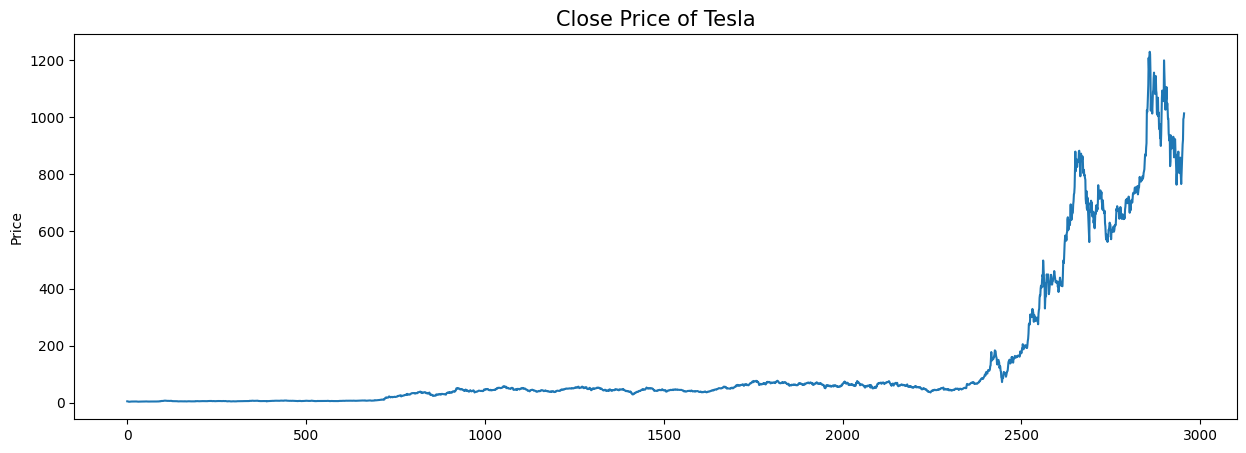

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df['Close']);
plt.title('Close Price of Tesla',fontsize = 15);
plt.ylabel('Price')
plt.show()

In [ ]:
df.head(n=5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


# ***We can remove one column as close and adj_close have literally the same data***

In [ ]:
df = df.drop(['Adj Close'], axis =1 ); #axis =1 refers to columns

In [ ]:
df.head(n=5)

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,34334500


In [ ]:
#checking for null values

df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

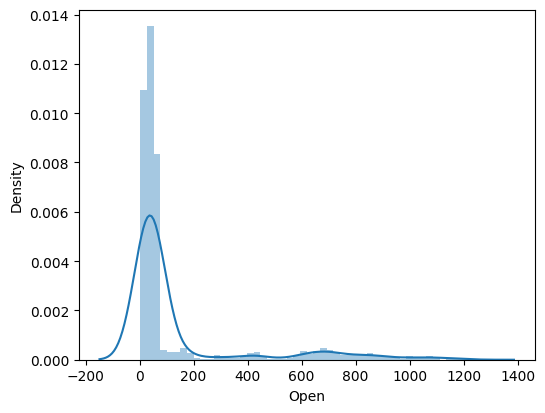

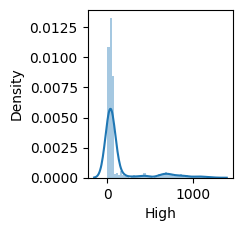

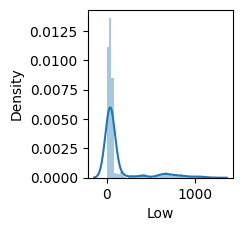

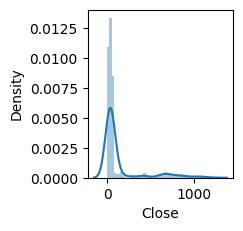

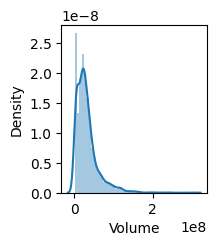

In [ ]:
features = ['Open','High','Low','Close','Volume']
plt.subplots(figsize = (20,10));#specify overall size of subplot
for i,col in enumerate(features):
  plt.subplot(2,3,i+1); #specify subplot configuration
  sb.distplot(df[col]); #seaborn has function distplot
  plt.show()

## ***Feature Engineering***

In [ ]:
#seperating date, month and year for further analysis

In [ ]:
splitted = df['Date'].str.split('/',expand = True)

In [ ]:
splitted.head(n=4)

,0
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02


In [ ]:
#assigning it to new columns in previous data frames

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  #converting date into standart datetime object


In [ ]:
df['Day'] = df['Date'].dt.day  #extracts the day in datetime function and assign it to new colum of dataframe called 'Day'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


Purpose: .dt is an accessor object used to extract date and time components or perform datetime-specific operations on Series with datetime64 data type.part of the pandas package

In [ ]:
df.head(n=5)

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010


In [ ]:
df['quater_end'] = np.where(df['Month']%3 == 0,1,0);

np.where is a NumPy function that evaluates a condition and assigns values based on whether the condition is True or False. Its syntax is:

np.where(condition, x, y)
condition: The condition that is evaluated. It should be a boolean expression or array-like object that evaluates to True or False.
here x is value when condition is true and y when it is false


In [ ]:
df.aggregate('mean')  #calculates mean of every col in the dataset

Date          2016-05-11 07:21:21.190798336
Open                             138.691296
High                             141.771603
Low                              135.425953
Close                            138.762183
Volume                      31314485.723951
Day                               15.713464
Month                              6.582882
Year                            2015.854871
quater_end                         0.335927
dtype: object

In [ ]:
grouped_data = df.groupby('Year').mean()

In [ ]:
grouped_data

,Date,Open,High,Low,Close,Volume,Day,Month,quater_end
Year,,,,,,,,,
2010,2010-09-29 10:53:32.307692288,4.681600,4.815446,4.529215,4.668369,7.898812e+06,16.030769,9.453846,0.346154
2011,2011-07-02 13:31:25.714285824,5.364397,5.476048,5.238833,5.360952,6.453077e+06,15.634921,6.547619,0.345238
2012,2012-07-01 02:18:14.400000000,6.240624,6.361832,6.109176,6.233720,6.148980e+06,15.776000,6.500000,0.328000
2013,2013-07-02 11:02:51.428571392,20.883286,21.370603,20.355976,20.880246,4.203861e+07,15.650794,6.543651,0.321429
2014,2014-07-02 19:31:25.714285824,44.683079,45.489976,43.841222,44.665817,3.456987e+07,15.761905,6.551587,0.337302
2015,2015-07-03 06:45:42.857142784,45.966389,46.676333,45.254127,46.008580,2.159162e+07,15.750000,6.567460,0.345238
2016,2016-07-02 16:51:25.714285824,42.011690,42.686699,41.257230,41.953452,2.306273e+07,15.682540,6.555556,0.341270
2017,2017-07-02 07:21:45.179282944,62.859243,63.690119,61.937394,62.863259,3.167393e+07,15.800797,6.533865,0.338645
2018,2018-07-01 10:59:45.657370624,63.436693,64.738725,62.110462,63.461984,4.306053e+07,15.796813,6.505976,0.318725


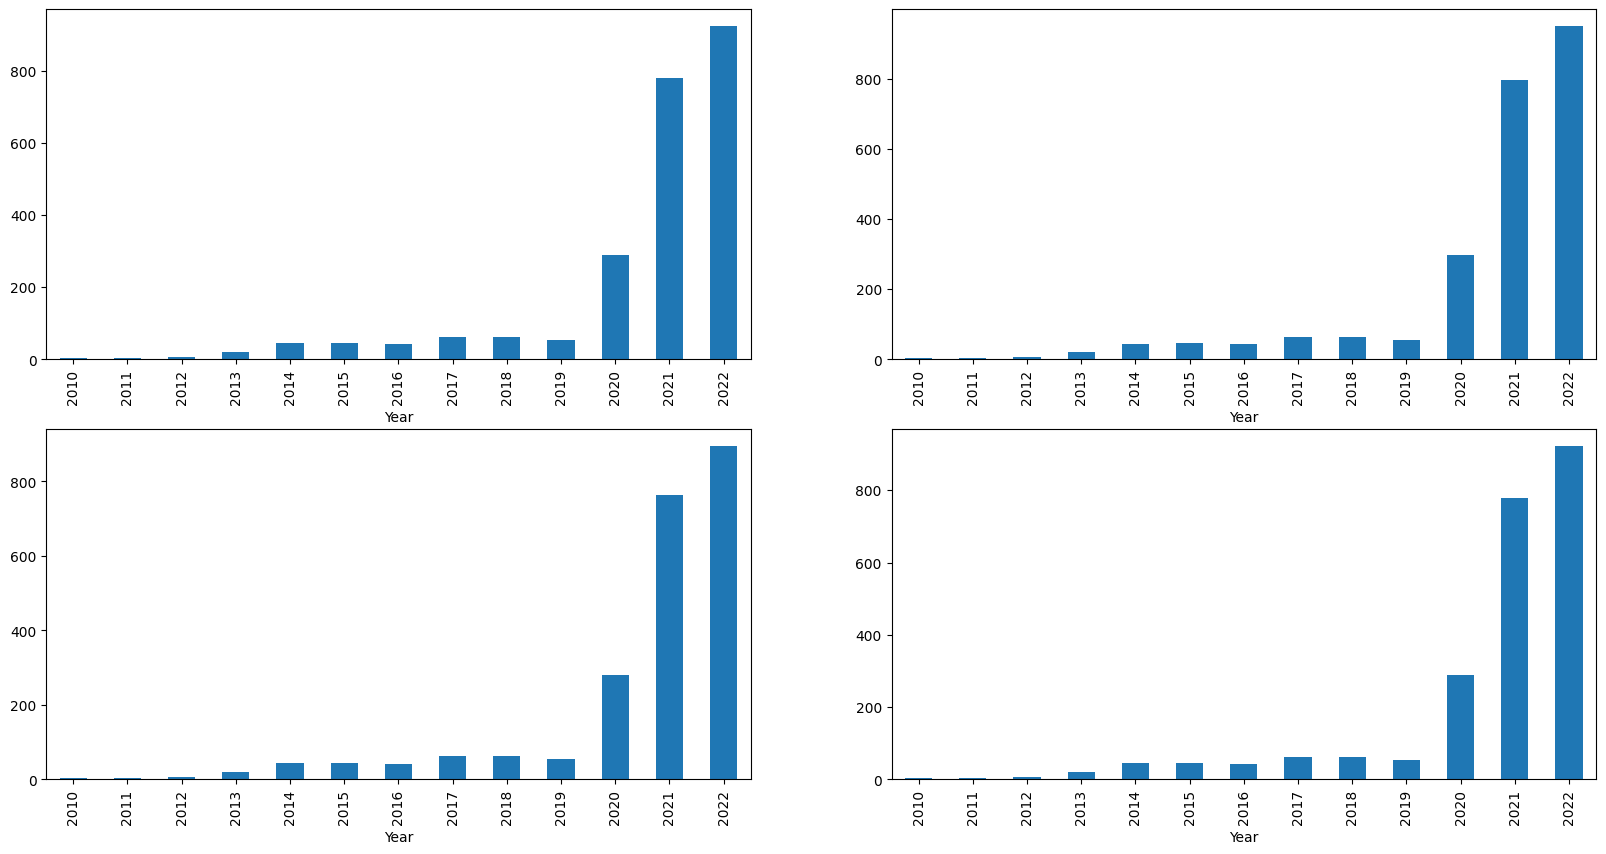

In [ ]:
#plotting the grouped data
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  grouped_data[col].plot.bar()
plt.show()

In [ ]:
Group_data = df.groupby('quater_end').mean()

In [ ]:
Group_data

,Date,Open,High,Low,Close,Volume,Day,Month,Year
quater_end,,,,,,,,,
0,2016-04-27 18:16:41.324503296,136.474690,139.523037,133.361644,136.531872,3.194378e+07,15.701987,6.124300,2015.855833
1,2016-06-07 01:58:54.743202560,143.073168,146.216652,139.506757,143.171146,3.007048e+07,15.736153,7.489426,2015.852971


# #the stock price is higher during the quater endings but the volume of trade is relatively smaller.

In [ ]:
# lets apply linear regression on the data for predicting the closing prices based on the input features.

In [ ]:
features = df[['Open', 'High', 'Low','Volume','Day','Month','Year','quater_end']]
target = df['Close']

scaler = StandardScaler()
features = scaler.fit_transform(features)


In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2660, 8) (296, 8)


In [ ]:
#it means we are using 2660 training examples and 296 are reserved for prediction testing

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_valid)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_valid, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2) score
r2 = r2_score(Y_valid, Y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 18.69249527099423
R-squared: 0.999686693529829


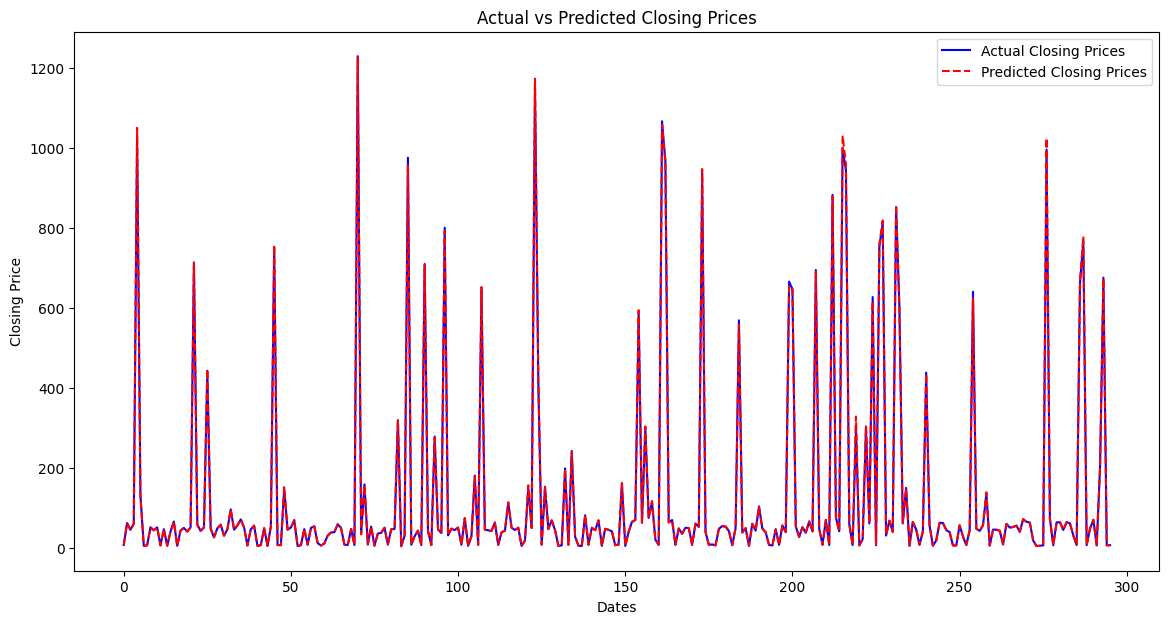

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(Y_valid.values, label='Actual Closing Prices', color='b')
plt.plot(Y_pred, label='Predicted Closing Prices', color='r', linestyle='--')
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, features, target, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared Score: {cv_scores.mean()}")


Cross-Validation R-squared Scores: [0.91331118 0.9990839  0.99706215 0.99474583 0.99918032]
Mean R-squared Score: 0.9806766761165149
